In [1]:
from pathlib import Path

from experiment import Experiment
from utils.stat_utils import stats_to_distribution, generate_discrete_distribution, qq_plot
from utils.data_utils import input_data_to_df, output_data_to_df


In [2]:
notebook_base_path = Path('/Users/konstantingrotov/Documents/programming/projects/clones-study/data/out/notebooks_11k_splitted')
scripts_base_path = Path('/Users/konstantingrotov/Documents/programming/projects/clones-study/data/out/scripts_10k_splitted')

notebooks_files, scripts_files = [], []

for num in range(1, 10 + 1):
    e = Experiment(
        notebooks_folder=notebook_base_path / f'{num}',
        scripts_folder=scripts_base_path / f'{num}',
        max_num=10_000)
    notebooks_files += e.files.get('notebooks')
    scripts_files += e.files.get('scripts')



In [3]:
# notebooks_path = Path('data/out/notebooks_1k')
# scripts_path = Path('data/out/scripts_1k')
#
# e = Experiment(
#     notebooks_folder=notebooks_path,
#     scripts_folder=scripts_path,
#     max_num=1_000
# )
#
# min_clone_length, max_clone_length = 3, 90
# e.run(normalize=False, drop_breaks=False, length_range=range(3, max_clone_length + 1))
#

# scripts_path = Path('data/out/scripts_1k')


e = Experiment(
    notebooks_folder=None,
    scripts_folder=None,
    in_path=None,
    max_num=10_000
)
e.files = {
    'notebooks': notebooks_files[:10_000],
    'scripts': scripts_files
}
min_clone_length, max_clone_length = 3, 90
e.run(normalize=False, drop_breaks=False, length_range=range(3, max_clone_length + 1))


10000it [00:07, 1303.04it/s]
9993it [00:07, 1291.80it/s]


In [4]:
xk_n, pk_n = stats_to_distribution(e.aggregated_stats.get('notebooks'))
xk_s, pk_s = stats_to_distribution(e.aggregated_stats.get('scripts'))

dist_n = generate_discrete_distribution(xk_n, pk_n)
dist_s = generate_discrete_distribution(xk_s, pk_s)


0.95-Quantile of scripts distribution is 45
0.95-Quantile of notebooks distribution is 54


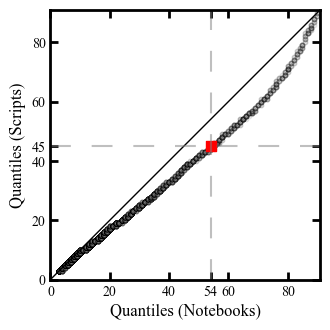

In [5]:
qq_plot(dist_n=dist_n, dist_s=dist_s, save_path=Path('figures/'))


0.95-Quantile of scripts distribution is 45
0.95-Quantile of notebooks distribution is 54.0


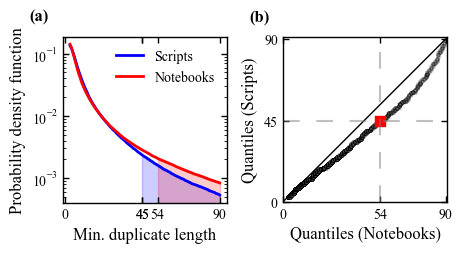

In [14]:
import numpy as np
import matplotlib.pyplot as plt
size=10_000
plt.rcParams["font.family"] = "Times New Roman"

np.random.seed(seed=42)
Rs, Rn = dist_s.rvs(size=size), dist_n.rvs(size=size)

width = 1
length = 4

q_scr = 45
prob_scripts = np.sum([dist_s.pmf(i) for i in range(3, q_scr + 1)])
q_ntb = np.quantile(Rn, prob_scripts)

print(f"{np.round(prob_scripts, 2)}-Quantile of scripts distribution is {q_scr}")
print(f"{np.round(prob_scripts, 2)}-Quantile of notebooks distribution is {q_ntb}")

cm = 1 / 2.54
figsize = (6 * cm * 2, 6 * cm)
fig, (ax1, ax) = plt.subplots(1, 2, figsize=figsize)

ax.set_aspect('equal')

ax.scatter(sorted(Rn), sorted(Rs), color='grey', alpha=0.1, edgecolors='black', s=5)
ax.plot([0, max_clone_length + 2], [0, max_clone_length + 2], color='black', linewidth=1)

ax.set_xlim(2, max_clone_length + 1)
ax.set_ylim(2, max_clone_length + 1)

ax.set_xlabel("Quantiles (Notebooks)", fontsize=12)
ax.set_ylabel("Quantiles (Scripts)", fontsize=12)

ax.axhline(45, color='grey', linestyle='--', dashes=(8, 8), alpha=0.5)
ax.axvline(q_ntb, color='grey', linestyle='--', dashes=(8, 8), alpha=0.5)
ax.scatter(q_ntb, 45, color='r', s=50, marker='s')

ax.tick_params(direction="in", length=length, width=width, labelsize=10)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.xaxis.set_ticks(list(np.arange(0, max_clone_length + 1, 90)) + [int(q_ntb)])
ax.yaxis.set_ticks(list(np.arange(0, max_clone_length + 1, 90)) + [45])
for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(width)
    ax1.spines[axis].set_linewidth(width)

ax1.plot(xk_s, pk_s, color='b', linewidth=2, label='Scripts')
ax1.plot(xk_n, pk_n, color='r', linewidth=2, label='Notebooks')
legend = ax1.legend()
legend.get_frame().set_facecolor('none')
legend.get_frame().set_linewidth(0.0)

ax1.tick_params(direction="in", length=length, width=width, labelsize=10)
ax1.tick_params(direction="in", which='minor', labelsize=10)

ax1.yaxis.set_ticks_position('both')
ax1.xaxis.set_ticks_position('both')

ax1.xaxis.set_ticks(list(np.arange(0, max_clone_length + 1, 45)) + [45, 54])

ax1.set_ylabel('Probability density function', fontsize=12)
ax1.set_xlabel('Min. duplicate length', fontsize=12)

ax1.set_yscale('log')
fig.tight_layout()

ax1.text(-0.2, 1.1, '(a)', transform=ax1.transAxes, fontsize=12, weight="bold")
ax.text(-0.2, 1.1, '(b)', transform=ax.transAxes, fontsize=12, weight="bold")

ax1.fill_between(xk_s[45-3:], pk_s[45-3:], step="pre", alpha=0.2, color='blue')
ax1.fill_between(xk_n[54-3:], pk_n[54-3:], step="pre", alpha=0.2, color='red')
if True:
    plt.savefig(Path('figures') / 'quantiles_distribution_2.pdf', dpi=200, bbox_inches='tight')


plt.show()

In [7]:
sum(pk_n), sum(pk_s)


(1.0, 0.9999999999999999)

# Data Example

# Input data

In [8]:
input_ntb_df = input_data_to_df(Path('data/in/notebooks_1k'))
input_ntb_df.head()


""


In [6]:
print(input_ntb_df.content.iloc[0])


import xarray as xr
import xclim as xc
# [___CELL_SEPARATOR___]
tasmax = xr.tutorial.open_dataset('air_temperature').air.resample(time='D').max(keep_attrs=True)
tasmax = tasmax.where(tasmax.time.dt.day % 10 != 0)
# [___CELL_SEPARATOR___]
tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
# [___CELL_SEPARATOR___]
xc.set_options(cf_compliance='log')

tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
# [___CELL_SEPARATOR___]
xc.set_options(check_missing='pct', missing_options={'pct': {'tolerance': 0.08}})

tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
tx_mean.sel(time='2013', lat=75, lon=200)
# [___CELL_SEPARATOR___]
with xc.set_options(check_missing="wmo"):
    tx_mean = xc.atmos.tx_mean(tasmax=tasmax, freq='MS') # compute monthly max tasmax
tx_mean.sel(time='2013', lat=75, lon=200)
# [___CELL_SEPARATOR___]
from xclim.core.missing import register_missing_method
from xclim.core.missing impor

# Output data

In [7]:
output_ntb_df = output_data_to_df(Path('data/out/notebooks_1k'))
output_ntb_df.head()


,totalGroups,totalClones,groups,name
0,35,102,"[{'clone_length': 14, 'clones': [{'psi': '[Psi...",537f25f0f5d7e58d0fd2ae40c55dbae47771081a#537f2...
1,15,38,"[{'clone_length': 2, 'clones': [{'psi': '[PsiE...",5f835d1ac0fed0728bb12c5d4cee65df81fa57a5#5f835...
2,3,11,"[{'clone_length': 3, 'clones': [{'psi': '[PsiE...",79467a65bdda2bbbe6a878cca4447f5038d5c903#79467...
3,184,589,"[{'clone_length': 3, 'clones': [{'psi': '[PsiE...",745ae92a5cdf72e2a75fcf4f09c1b1d52824923b#745ae...
4,0,0,[],c38feb09d567b2f76802c58199a82b4776c0be3d#c38fe...


In [8]:
output_ntb_df.groups.iloc[0][0]['clones'][0]


{'psi': '[PsiElement(Py:IDENTIFIER), PsiElement(Py:EQ), PsiElement(Py:IDENTIFIER), PsiElement(Py:DOT), PsiElement(Py:IDENTIFIER), PsiElement(Py:LPAR), PsiElement(Py:IDENTIFIER), PsiElement(Py:EQ), PsiElement(Py:INTEGER_LITERAL), PsiElement(Py:RPAR), PsiElement(Py:RPAR), PsiElement(Py:IDENTIFIER), PsiElement(Py:LPAR), PsiElement(Py:IDENTIFIER)]',
 'text': 'options=Optim.Options(iterations=10))\nprint(o',
 'position': [2848, 2892]}